In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpltex

In [2]:
def load_csv(filename):
    data = np.genfromtxt(filename, delimiter='\t')
    return data

In [3]:
q_data = []
for end_val in [50, 95, 140, 185]:
    q_data.append(load_csv(f'window_{end_val}/qs.dat'))

In [4]:
# connect the last five with the first five between consecutive windows

offsets = []
for i in range(len(q_data)-1):
    q_left = q_data[i]
    q_right = q_data[i+1]

    mean_left = np.mean(q_left[-5:,1])
    mean_right = np.mean(q_right[:5,1])
    print(mean_left, mean_right)

    offsets.append(mean_right - mean_left + (offsets[-1] if offsets else 0))



4383.508 4215.152
4384.772 4224.7699999999995
4413.644 2743.038


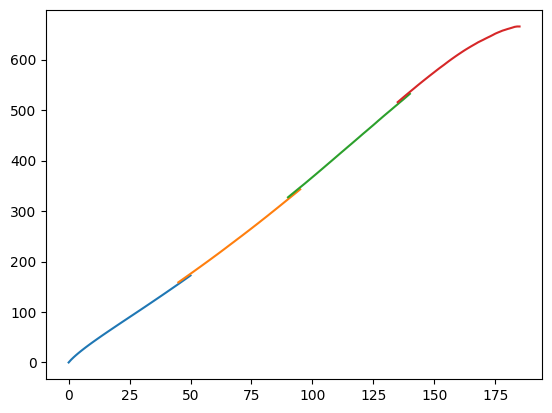

In [5]:
fig, ax = plt.subplots()
zero = q_data[0][0,1]

plt.plot(q_data[0][:,0], -zero+q_data[0][:,1])
offsets_p = offsets.copy()
for window in q_data[1:]:
    plt.plot(window[:,0], -zero+window[:,1]-offsets_p.pop(0))

# plt.xlabel('$N$')
# plt.ylabel('$\ln Q$')
plt.show()

In [ ]:
kBT = 1.0